<a href="https://colab.research.google.com/github/Oury90/Sales_2019/blob/main/Project_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#installing Dependencies
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

Download dataset

In [6]:
path='/content/datas'
files = [file for file in os.listdir(path)]
for file in files:
  print(file)

Sales_May_2019.csv
Sales_November_2019.csv
Sales_December_2019.csv
Sales_June_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv
Sales_February_2019.csv
Sales_April_2019.csv
Sales_August_2019.csv
Sales_March_2019.csv


Get a dataset

In [9]:
my_datas = pd.DataFrame()
for file in files:
    current_data = pd.read_csv(path + '/' + file)
    my_datas = pd.concat([my_datas, current_data], ignore_index=True)

my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [11]:
my_datas.shape

(186850, 6)

In [12]:
my_datas.isnull().sum()

,0
Order ID,545
Product,545
Quantity Ordered,545
Price Each,545
Order Date,545
Purchase Address,545


In [14]:
my_datas.dropna(how='all', inplace=True)
my_datas.shape

(186305, 6)

In [15]:
my_datas.isnull().sum()

,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [16]:
my_datas.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,object
Price Each,object
Order Date,object
Purchase Address,object


In [17]:
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


In [21]:
def month(x):
  return x.split('/')[0]

my_datas['Month']=my_datas['Order Date'].apply(month)
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",05
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",05
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",05
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",05
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",05


In [24]:
my_datas['Month'].unique()

array(['05', 'Order Date', '06', '11', '12', '01', '07', '02', '08', '10',
       '09', '03', '04'], dtype=object)

In [25]:
my_datas=my_datas[my_datas['Month']!= 'Order Date']

In [26]:
my_datas['Month'].unique()

array(['05', '06', '11', '12', '01', '07', '02', '08', '10', '09', '03',
       '04'], dtype=object)

In [27]:
my_datas['Month'] = my_datas['Month'].astype(int)

<ipython-input-27-1a7da80f927c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['Month'] = my_datas['Month'].astype(int)


In [28]:
my_datas['Quantity Ordered'] = my_datas['Quantity Ordered'].astype(int)
my_datas['Price Each'] = my_datas['Price Each'].astype(float)

<ipython-input-28-6188df95b781>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['Quantity Ordered'] = my_datas['Quantity Ordered'].astype(int)
<ipython-input-28-6188df95b781>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['Price Each'] = my_datas['Price Each'].astype(float)


In [29]:
my_datas.dtypes

,0
Order ID,object
Product,object
Quantity Ordered,int64
Price Each,float64
Order Date,object
Purchase Address,object
Month,int64


In [30]:
my_datas['Sales'] = my_datas['Quantity Ordered'] * my_datas['Price Each']
my_datas.head(5)

<ipython-input-30-ab474dc56696>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['Sales'] = my_datas['Quantity Ordered'] * my_datas['Price Each']


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


# What is the month during which we achieved the highest revenue?

In [31]:
my_datas.groupby('Month')['Sales'].sum()

,Sales
Month,
1,1822256.73
2,2202022.42
3,2807100.38
4,3390670.24
5,3152606.75
6,2577802.26
7,2647775.76
8,2244467.88
9,2097560.13


<Axes: xlabel='Month'>

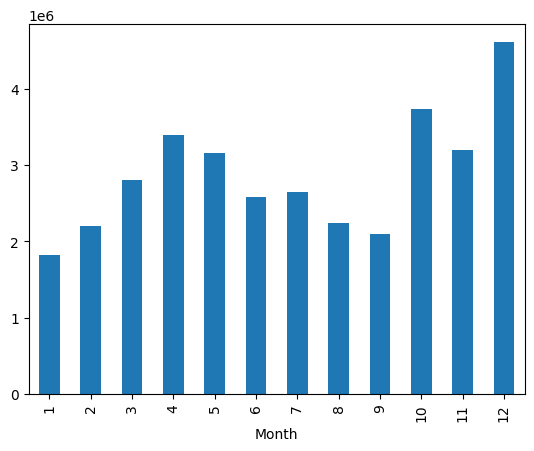

In [34]:
my_datas.groupby('Month')['Sales'].sum().plot.bar()

# In which city did we record the highest number of orders?

In [35]:
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98


In [36]:
def city(x):
  return x.split(',')[1]

my_datas['City'] = my_datas['Purchase Address'].apply(city)
my_datas.head(5)

<ipython-input-36-2e610410c98d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['City'] = my_datas['Purchase Address'].apply(city)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle


In [38]:
my_datas.groupby('City')['Quantity Ordered'].sum()

,Quantity Ordered
City,
Atlanta,16602
Austin,11153
Boston,22528
Dallas,16730
Los Angeles,33289
New York City,27932
Portland,14053
San Francisco,50239
Seattle,16553


<Axes: xlabel='City'>

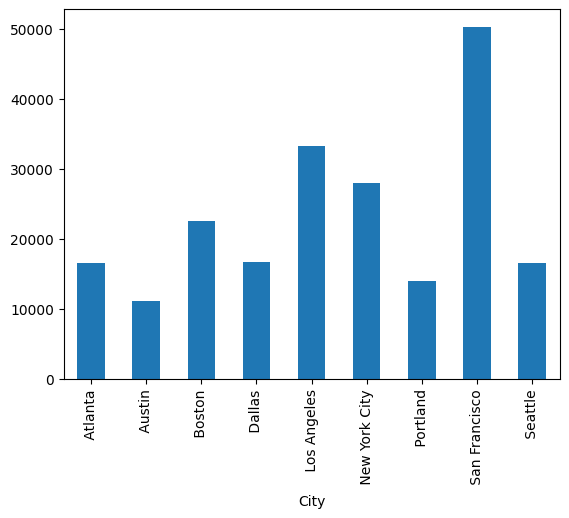

In [42]:
my_datas.groupby('City')['Quantity Ordered'].sum().plot.bar()

# When is the best time to run an advertising campaign to increase sales?

In [43]:
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle


In [44]:
my_datas['Hours'] = pd.to_datetime(my_datas['Order Date']).dt.hour
my_datas.head(5)

<ipython-input-44-962fc78a0077>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  my_datas['Hours'] = pd.to_datetime(my_datas['Order Date']).dt.hour
<ipython-input-44-962fc78a0077>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_datas['Hours'] = pd.to_datetime(my_datas['Order Date']).dt.hour


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle,22


In [53]:
hours =[]
keys =[]
for key, hour in my_datas.groupby('Hours'):
  keys.append(key)
  hours.append(len(hour))

<Axes: xlabel='Hours'>

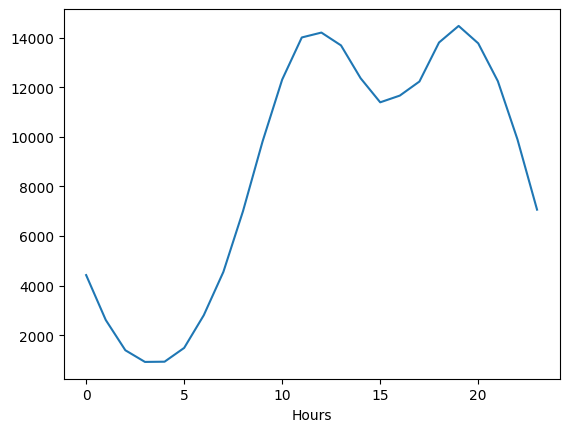

In [55]:
my_datas.groupby('Hours')['Quantity Ordered'].sum().plot()

# Which product sells the most?

In [56]:
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle,22


<Axes: xlabel='Product'>

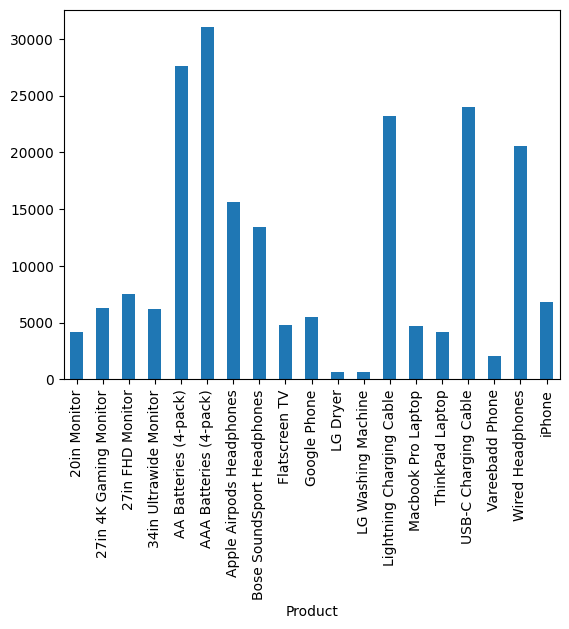

In [58]:
my_datas.groupby('Product')['Quantity Ordered'].sum().plot.bar()

In [59]:
my_datas.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hours
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,11.99,New York City,17
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,3.84,Dallas,14
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,149.99,New York City,11
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,11.99,Dallas,20
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,5.98,Seattle,22
